<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3SPN.py-module" data-toc-modified-id="3SPN.py-module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>3SPN.py module</a></span></li><li><span><a href="#Write-pdb" data-toc-modified-id="Write-pdb-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Write pdb</a></span></li><li><span><a href="#Configuration-file" data-toc-modified-id="Configuration-file-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Configuration file</a></span></li><li><span><a href="#Topology" data-toc-modified-id="Topology-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Topology</a></span></li><li><span><a href="#Openmm" data-toc-modified-id="Openmm-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Openmm</a></span></li><li><span><a href="#Analyzing-distance-between-atoms-in-DNA" data-toc-modified-id="Analyzing-distance-between-atoms-in-DNA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analyzing distance between atoms in DNA</a></span></li><li><span><a href="#Parameter-tables-from-pair_3SPN.cpp" data-toc-modified-id="Parameter-tables-from-pair_3SPN.cpp-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Parameter tables from pair_3SPN.cpp</a></span></li></ul></div>

In [87]:
def parse_xyz(filename=''):
    import pandas
    columns=['N','timestep','id','type','x','y','z']
    data=[]
    with open(filename,'r') as traj_file:
        atom=pandas.Series(index=columns)
        atom['id']=None
        for line in traj_file:
            s=line.split()
            if len(s)==1:
                atom['N']=int(s[0])
                if atom['id']>-1:
                    assert atom['id']==atoms
            elif len(s)==3:
                atom['timestep']=int(s[2])
                atom['id']=0
            elif len(s)>3:
                atom['type']=int(s[0])
                atom['x'],atom['y'],atom['z']=[float(a) for a in s[1:4]]
                data+=[atom.copy()]
                atom['id']+=1
    xyz_data=pandas.concat(data,axis=1).T
    for i in ['N','timestep','id','type']:
        xyz_data[i]=xyz_data[i].astype(int)
    return xyz_data

xyz_data=parse_xyz('examples/adna/traj.xyz')
xyz_data.head()

,N,timestep,id,type,x,y,z
0,190,0,0,2,8.58965,-3.78079,36.7962
1,190,0,1,7,4.34621,-3.76733,38.8102
2,190,0,2,1,7.94840,-4.71664,33.1902
3,190,0,3,2,5.28903,-7.73628,34.2362
4,190,0,4,4,2.67934,-5.08126,36.2232


In [89]:
def parse_log(filename=''):
    log_data=[]
    with open(filename,'r') as log_file:
        start=False
        for line in log_file:
            if line[:4]=='Step':
                columns=line.split()
                start=True
                continue
            if start:
                try:
                    log_data+=[[float(a) for a in line.split()]]
                except ValueError:
                    break
    log_data=pandas.DataFrame(log_data,columns=columns)
    for i in ['Step','nbp']:
        log_data[i]=log_data[i].astype(int)
    return log_data

log_data=parse_log('examples/adna/sim.log')  
log_data.head()

,Step,nbp,E_bond,E_angle,E_dihed,ebp,ecstk,eexcl,dna_ecou,Temp
0,0,32,0.000003,-196.16418,-172.08408,151.26460,-38.325871,0.000000,16.188186,300.00000
1,2000,28,24.743755,-117.36010,-159.13041,-131.48619,-27.761789,0.457346,15.624721,274.65581
2,4000,25,18.247548,-112.62425,-159.79075,-127.91639,-26.020523,0.366243,15.501250,302.20836
3,6000,23,29.761028,-110.52217,-157.94893,-124.25461,-24.985929,0.273812,15.415172,283.52818
4,8000,21,24.085343,-118.21948,-161.86563,-122.99406,-25.127450,0.424175,14.765881,288.93200


In [111]:
data=pandas.read_csv('examples/adna/in00_conf.xyz',delim_whitespace=True,skiprows=2,names=['type','x','y','z'])
assert data.at[8,'type']=='P'
assert round(data.at[188,'y'],6)==-8.779343

In [112]:
data.at[188,'y']

-8.779342999999999

## 3SPN.py module

In [121]:
import importlib
import ff3SPN2


<module 'ff3SPN2' from '/home/cab22/Programs/USER-3SPN2/ff3SPN2.py'>

In [514]:
importlib.reload(ff3SPN2)
DNA=ff3SPN2.DNA.fromXYZ('examples/adna/in00_conf.xyz')
DNA.parseConfigurationFile()
DNA.atoms.head()
DNA.computeTopology('A')
DNA.writePDB()
#DNA.bonds

## Write pdb

<center>PDB atom format</center>


|Line Position  |Format        |Name         |Description|
|--|--|--|--|
|1 -  6         |Record name   |"ATOM  "     ||
|7 - 11         |Integer       |serial       |Atom  serial number.  |
|13 - 16        |Atom          |name         |Atom name.|
|17             |Character     |altLoc       |Alternate location indicator.|
|18 - 20        |Residue name  |resName      |Residue name.|
|22             |Character     |chainID      |Chain identifier.|
|23 - 26        |Integer       |resSeq       |Residue sequence number.|
|27             |AChar         |iCode        |Code for insertion of residues.|
|31 - 38        |Real(8.3)     |x            |Orthogonal coordinates for X in Angstroms.|
|39 - 46        |Real(8.3)     |y            |Orthogonal coordinates for Y in Angstroms.|
|47 - 54        |Real(8.3)     |z            |Orthogonal coordinates for Z in Angstroms.|
|55 - 60        |Real(6.2)     |occupancy    |Occupancy.|
|61 - 66        |Real(6.2)     |tempFactor   |Temperature  factor.|
|77 - 78        |LString(2)    |element      |Element symbol, right-justified.|
|79 - 80        |LString(2)    |charge       |Charge  on the atom.|

In [472]:
chain_ix='ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
DNA.atoms['chainid']=[chain_ix[i-1] for i in DNA.atoms['chain']]

res_ix={}
min_res=DNA.atoms.groupby('chain')['residue'].min()
max_res=DNA.atoms.groupby('chain')['residue'].max()
for i,res in DNA.atoms[~DNA.atoms['type'].isin(['S','P'])].iterrows():
    resname=res['type']
    if res['residue']==min_res[res['chain']]:
        resname+='i'
    if res['residue']==max_res[res['chain']]:
        resname+='f'
    res_ix.update({(res['chain'],res['residue']):resname})
DNA.atoms['resname']=[res_ix[(r['chain'],r['residue'])] for i,r in DNA.atoms.iterrows()]
element_ix={'P':'P','S':'H','A':'N','T':'S','C':'O','G':'C'}
DNA.atoms['element'] = [element_ix[atomType] for atomType in DNA.atoms['type']]

pdb_file='clean.pdb'
with open(pdb_file,'w+') as pdb:
    for i,atom in DNA.atoms.iterrows():
        pdb_line=f'ATOM  {i+1:>5} {atom.type:^4} {atom.resname:<3}  {atom.chainid}{atom.residue:>3}    {atom.x:>8.3f}{atom.y:>8.3f}{atom.z:>8.3f}'+' '*22+f'{atom.element:2}'+' '*2
        assert len(pdb_line)==80,'An item in the atom table is longer than expected'
        pdb.write(pdb_line+'\n')

In [473]:
DNA.atoms

,type,x,y,z,residue,chain,chainid,resname,element
0,S,8.589651,-3.780794,36.796183,1,1,A,Ai,H
1,A,4.346207,-3.767331,38.810183,1,1,A,Ai,N
2,P,7.948400,-4.716636,33.190183,2,1,A,T,P
3,S,5.289033,-7.736279,34.236183,2,1,A,T,H
4,T,2.679337,-5.081256,36.223183,2,1,A,T,S
5,P,4.243834,-8.177370,30.630183,3,1,A,A,P
6,S,0.374616,-9.281735,31.676183,3,1,A,A,H
7,A,-1.379608,-5.417837,33.690183,3,1,A,A,N
8,P,-0.743226,-9.088259,28.070183,4,1,A,C,P
9,S,-4.595838,-7.927286,29.116183,4,1,A,C,H


## Configuration file

In [260]:
#Parsing bonds
import configparser
config = configparser.ConfigParser()
config.read('3SPN2.conf')
s=config['Bonds']
def parseConfigTable(config_section):
    def readData(config_section,a):
        '''Filters comments and returns values as a list'''
        temp=config_section.get(a).split('#')[0].split()
        l=[]
        for val in temp:
            val=val.strip()
            try:
                x=int(val)
                l+=[x]
            except ValueError:
                try:
                    y=float(val)
                    l+=[y]
                except ValueError:
                    l+=[val]
        return l
    data=[]
    for a in config_section:
        if a=='name':
            columns=readData(config_section,a)
        elif len(a)>3 and a[:3]=='row':
            data+=[readData(config_section,a)]
        else:
            print (f'Unexpected row {readData(config_section,a)}')
    return pandas.DataFrame(data,columns=columns)
temp=parseConfigTable(config['Dihedrals'])

In [266]:
temp['eps']

0    0.3
1    0.3
2    0.3
3    0.3
Name: eps, dtype: float64

In [248]:
config['Angles'].get('row13').split('#')[0].split()

['A',
 'S',
 'A',
 'G',
 '0',
 '1',
 'stacking/3spn2',
 '3.166826',
 '4.261',
 '111.32',
 '3',
 '6']

In [206]:
s.get('adna1')

'P S 0   4.157\t0.143403\t0\t14.340344 ;#Phosphate - Sugar 3-4,6-7'

## Topology

In [367]:
DNA.parseConfigurationFile()
#Make an index to build the topology
index={}
cr_list=set()#Chain residue list
for i,atom in DNA.atoms.iterrows():
    index.update({(atom['chain'],atom['residue'],atom['type']):i})
    cr_list.update([(atom['chain'],atom['residue'])])
cr_list=list(cr_list)
cr_list.sort()
max_chain=DNA.atoms['chain'].max()
max_residue=DNA.atoms['residue'].max()
assert len(index)==len(DNA.atoms),'Atom index was repeated'

#Select ADNA bond definitions
bond_types=DNA.bond_definition[DNA.bond_definition['DNA']=='A']
angle_types=DNA.angle_definition[DNA.angle_definition['DNA']=='A']
dihedral_types=DNA.dihedral_definition[DNA.dihedral_definition['DNA']=='A']

#Make a table with bonds
data=[]
for i,ftype in bond_types.iterrows():
    #print(bond_type)
    ai=ftype['i']
    aj=ftype['j']
    s1=ftype['s1']
    for c,r in cr_list:
        k1=(c,r,ai)
        k2=(c,r+s1,aj)
        if k1 in index and k2 in index:
            data+=[[i,index[k1],index[k2]]]
data=pandas.DataFrame(data,columns=['type','aai','aaj'])
bonds=data.merge(bond_types,left_on='type',right_index=True)

#Make a table with angles
data=[]
for i,ftype in angle_types.iterrows():
    #print(bond_type)
    ai=ftype['i']
    aj=ftype['j']
    ak=ftype['k']
    s1=ftype['s1']
    s2=ftype['s2']
    for c,r in cr_list:
        k1=(c,r,ai)
        k2=(c,r+s1,aj)
        k3=(c,r+s2,ak)
        if k1 in index and k2 in index and k3 in index:
            data+=[[i,index[k1],index[k2],index[k3]]]
data=pandas.DataFrame(data,columns=['type','aai','aaj','aak'])
angles=data.merge(angle_types,left_on='type',right_index=True)

#Make a table with dihedrals
data=[]
for i,ftype in dihedral_types.iterrows():
    #print(bond_type)
    ai=ftype['i']
    aj=ftype['j']
    ak=ftype['k']
    al=ftype['l']
    s1=ftype['s1']
    s2=ftype['s2']
    s3=ftype['s3']
    for c,r in cr_list:
        k1=(c,r,ai)
        k2=(c,r+s1,aj)
        k3=(c,r+s2,ak)
        k4=(c,r+s3,al)
        if k1 in index and k2 in index and k3 in index and k4 in index:
            data+=[[i,index[k1],index[k2],index[k3],index[k4]]]
data=pandas.DataFrame(data,columns=['type','aai','aaj','aak','aal'])
dihedrals=data.merge(dihedral_types,left_on='type',right_index=True)

In [368]:
dihedrals

,type,aai,aaj,aak,aal,DNA,i,j,k,l,s1,s2,s3,K1,t0,eps
0,0,0,2,3,5,A,S,P,S,P,1,1,2,1.434034,-9.58,0.3
1,0,3,5,6,8,A,S,P,S,P,1,1,2,1.434034,-9.58,0.3
2,0,6,8,9,11,A,S,P,S,P,1,1,2,1.434034,-9.58,0.3
3,0,9,11,12,14,A,S,P,S,P,1,1,2,1.434034,-9.58,0.3
4,0,12,14,15,17,A,S,P,S,P,1,1,2,1.434034,-9.58,0.3
5,0,15,17,18,20,A,S,P,S,P,1,1,2,1.434034,-9.58,0.3
6,0,18,20,21,23,A,S,P,S,P,1,1,2,1.434034,-9.58,0.3
7,0,21,23,24,26,A,S,P,S,P,1,1,2,1.434034,-9.58,0.3
8,0,24,26,27,29,A,S,P,S,P,1,1,2,1.434034,-9.58,0.3
9,0,27,29,30,32,A,S,P,S,P,1,1,2,1.434034,-9.58,0.3


In [ ]:
def ComputeTopology(self):
        sbonds = []
        sangles = []
        sdihedrals = []
        for _,c in self.atom_list.groupby('chain_index'):
            ix={}
            for name,aa in c.groupby('atom_name'):
                ix.update({name:list(aa.index)})
            
            for SB,B in zip([sbonds,sangles,sdihedrals],[bonds,angles,dihedrals]):
                for _,b in B.iterrows():
                    temp=pandas.DataFrame(columns=B.columns)
                    if 'skip' not in b:
                        b['skip']=0
                    
                    if b['i'] not in ix.keys():
                        continue
                        
                    i1=ix[b['i']][b['skip']:]
                    i2=ix[b['j']][:-b['skip']] if b['skip']!=0 else ix[b['j']]
                    assert(len(i1)==len(i2))
                    temp['i']=i1
                    temp['j']=i2
                    if 'l' in b:
                        i3=ix[b['l']]
                        assert(len(i1)==len(i3))
                        temp['l']=i3
                    if 'm' in b:
                        i4=ix[b['m']]
                        assert(len(i1)==len(i4))
                        temp['m']=i4
                    for col in temp:
                        if col not in ['i','j','l','m']:
                            temp[col]=b[col]
                    SB+=[temp]
        sbonds=pandas.concat(sbonds,sort=False)
        sbonds.sort_values(['i','j'],inplace=True)
        sangles=pandas.concat(sangles,sort=False)
        sangles.sort_values(['i','j','l'],inplace=True)
        sdihedrals=pandas.concat(sdihedrals,sort=False)
        sdihedrals.sort_values(['i','j','l','m'],inplace=True)
        self.sbonds=sbonds.reset_index(drop=True)
        self.sangles=sangles.reset_index(drop=True)
        self.sdihedrals=sdihedrals.reset_index(drop=True)

## Openmm

In [925]:
importlib.reload(ff3SPN2)
dna=ff3SPN2.DNA.fromXYZ('examples/adna/in00_conf.xyz')
dna.parseConfigurationFile()
dna.atoms.head()
dna.computeTopology('A')
dna.writePDB()
system=ff3SPN2.System(dna)
system.getPotentialEnergy()

0.0

In [929]:
for i,b in DNA.bonds.iterrows():
    break

In [938]:
1*angstrom/nanometer

0.1

In [948]:
importlib.reload(ff3SPN2)
traj=ff3SPN2.parse_xyz('examples/adna/traj.xyz')
log=ff3SPN2.parse_log('examples/adna/sim.log')

#Bonds
importlib.reload(ff3SPN2)

ef=1*kilocalorie/kilojoule
df=1*angstrom/nanometer
data={}
for i,b in DNA.bonds.iterrows():
    bondForce=simtk.openmm.CustomBondForce("Kb2*(r-r0)^2+Kb3*(r-r0)^3+Kb4*(r-r0)^4")
    bondForce.addPerBondParameter('r0')
    bondForce.addPerBondParameter('Kb2')
    bondForce.addPerBondParameter('Kb3')
    bondForce.addPerBondParameter('Kb4')
    bondForce.setUsesPeriodicBoundaryConditions(False)
    parameters=[b['r0']*df, b['Kb2']*df**2*cf, b['Kb3']*df**3*cf, b['Kb4']*df**4*cf]
    bondForce.addBond(int(b['aai']), int(b['aaj']), parameters)
    #print(parameters)
    #print(b)
    #Clear forces
    [system.removeForce(0) for i,f in enumerate(system.getForces())]
    system.addForce(bondForce)
    simulation=system.initializeMD()
    energies=[]
    for time,snapshot in traj.groupby('timestep'):
        #print (time,snapshot[['x','y','z']])
        simulation.context.setPositions(np.array(snapshot[['x','y','z']])*nanometers/10)
        state = simulation.context.getState(getEnergy=True)
        energy=state.getPotentialEnergy().value_in_unit(kilojoule_per_mole)
        #print (time,energy)
        energies+=[energy/4.184]
        data.update({i:energies})
    #log.plot(x='Step',y=['E_bond','openmm_bond'])
    #plt.savefig('bond_energy.png')
    

In [969]:
importlib.reload(ff3SPN2)
traj=ff3SPN2.parse_xyz('examples/adna/traj.xyz')
log=ff3SPN2.parse_log('examples/adna/sim.log')

#Bonds
importlib.reload(ff3SPN2)
system=ff3SPN2.System(dna)
ef=1*kilocalorie/kilojoule #energy scaling factor
df=1*angstrom/nanometer #distance scaling factor
data={}

[system.removeForce(0) for i,f in enumerate(system.getForces())]

bondForce=simtk.openmm.CustomBondForce("Kb2*(r-r0)^2+Kb3*(r-r0)^3+Kb4*(r-r0)^4")
bondForce.addPerBondParameter('r0')
bondForce.addPerBondParameter('Kb2')
bondForce.addPerBondParameter('Kb3')
bondForce.addPerBondParameter('Kb4')
bondForce.setUsesPeriodicBoundaryConditions(False)
for i,b in DNA.bonds.iterrows():

    parameters=[b['r0']*df, b['Kb2']*df**2*cf, b['Kb3']*df**3*cf, b['Kb4']*df**4*cf]
    bondForce.addBond(int(b['aai']), int(b['aaj']), parameters)
system.addForce(bondForce)

simulation=system.initializeMD()
energies=[]
for time,snapshot in traj.groupby('timestep'):
    #print (time,snapshot[['x','y','z']])
    energy=system.getPotentialEnergy(np.array(snapshot[['x','y','z']])*df)
    energies+=[energy/4.184]
    data.update({i:energies})
    #log.plot(x='Step',y=['E_bond','openmm_bond'])
    #plt.savefig('bond_energy.png')
    

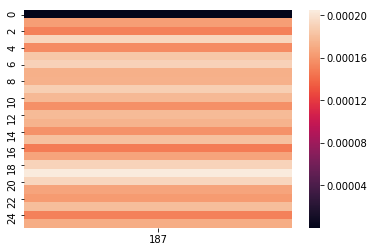

In [970]:
sns.heatmap(pandas.DataFrame(data))

In [923]:
state = system.simulation.context.getState(getEnergy=True)
state.
#system.top.topology,top.topology
#system._wrapped_system
#system.integrator


In [ ]:
import simtk.openmm.app
import simtk.openmm
from simtk.unit import *
DNA.top=simtk.openmm.app.PDBFile(DNA.pdb_file)
DNA.coord=simtk.openmm.app.PDBFile(DNA.pdb_file)
DNA.periodic_box=[10,10,10]
DNA.forcefield=simtk.openmm.app.ForceField('3SPN2.xml')
DNA.system = forcefield.createSystem(top.topology)
DNA.system.setDefaultPeriodicBoxVectors(*np.diag(DNA.periodic_box))

In [724]:
#Clear forces
[DNA.system.removeForce(0) for i,f in enumerate(DNA.system.getForces())]

#Bonds
bondForce=simtk.openmm.CustomBondForce("Kb2*(r-r0)^2+Kb3*(r-r0)^3+Kb4*(r-r0)^4")
bondForce.addPerBondParameter('r0')
bondForce.addPerBondParameter('Kb2')
bondForce.addPerBondParameter('Kb3')
bondForce.addPerBondParameter('Kb4')
bondForce.setUsesPeriodicBoundaryConditions(False)
cf=4.184
for i,b in DNA.bonds.iterrows():
    parameters=[b['x0']/10., b['K2']*100*cf, b['K3']*1000*cf, b['K4']*10000*cf]
    bondForce.addBond(int(b['aai']), int(b['aaj']), parameters)
    print(parameters)
    #print(b)
DNA.system.addForce(bondForce)

[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.99981520000001, 0.0, 599999.9929600001]
[0.4157, 59.

0

In [725]:
#Do a simulation
from sys import stdout
import time
simulation_platform='Reference'
temperature=300*kelvin
integrator = simtk.openmm.LangevinIntegrator(temperature, 1E-4/picosecond, 2*femtoseconds)

platform = simtk.openmm.Platform.getPlatformByName(simulation_platform)
simulation = simtk.openmm.app.Simulation(DNA.top.topology, DNA.system, integrator,platform)

simulation.context.setPositions(DNA.coord.positions)
simulation.reporters.append(simtk.openmm.app.PDBReporter('output.pdb', 1000),)
simulation.reporters.append(simtk.openmm.app.DCDReporter('output.dcd', 1000),)
#sim_out=open('sim_out.txt','w+')
simulation.reporters.append(simtk.openmm.app.StateDataReporter(stdout, 1000, step=True,time=True,potentialEnergy=True, temperature=True,separator='\t',))
simulation.reporters.append(simtk.openmm.app.StateDataReporter('sim.log', 1000, step=True,time=True,totalEnergy=True,
                                              kineticEnergy=True,potentialEnergy=True, temperature=True))
state = simulation.context.getState(getEnergy=True)
energy=state.getPotentialEnergy().value_in_unit(kilojoule_per_mole)
print (energy)
simulation.minimizeEnergy()
simulation.context.setVelocitiesToTemperature(300*kelvin)
time0=time.ctime()
time_0=time.time()
simulation.step(100000)


2.8033587578736098e-05
#"Step"	"Time (ps)"	"Potential Energy (kJ/mole)"	"Temperature (K)"
1000	2.0000000000000013	95.6061572807392	256.1505907927963
2000	3.999999999999781	100.47525961120192	254.6119015695822
3000	5.999999999999561	82.38736666227999	262.25927279502883
4000	7.999999999999341	96.09328632051243	256.8178023371883
5000	10.000000000000009	73.6290479194881	266.54493666545
6000	12.000000000000677	73.18006828902284	266.75537661105324
7000	14.000000000001345	93.47600496572312	258.62192040529095
8000	16.00000000000201	81.5744773022754	263.20042254082784
9000	18.000000000000902	89.76642394082158	259.83753965161384
10000	19.999999999999794	94.64733410313222	257.93757890138585
11000	21.999999999998685	87.05968677080571	261.46080594360774
12000	23.999999999997577	91.79928331443038	260.6211179158476
13000	25.99999999999647	83.7324330830381	264.14267702288987
14000	27.99999999999536	87.33134482965785	262.13949636244286
15000	29.99999999999425	88.14944936881632	261.8682245411902
16000	3

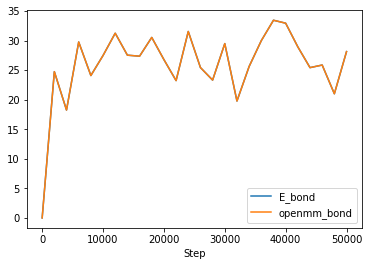

In [727]:
importlib.reload(ff3SPN2)
traj=ff3SPN2.parse_xyz('examples/adna/traj.xyz')
log=ff3SPN2.parse_log('examples/adna/sim.log')
simulation_platform='Reference'
temperature=300*kelvin
integrator = simtk.openmm.LangevinIntegrator(temperature, 1E-4/picosecond, 0.1*picoseconds)

platform = simtk.openmm.Platform.getPlatformByName(simulation_platform)
simulation = simtk.openmm.app.Simulation(DNA.top.topology, DNA.system, integrator,platform)
energies=[]
for time,snapshot in traj.groupby('timestep'):
    #print (time,snapshot[['x','y','z']])
    simulation.context.setPositions(np.array(snapshot[['x','y','z']])*nanometers/10)
    state = simulation.context.getState(getEnergy=True)
    energy=state.getPotentialEnergy().value_in_unit(kilojoule_per_mole)
    #print (time,energy)
    energies+=[energy/4.184]
log['openmm_bond']=energies
log.plot(x='Step',y=['E_bond','openmm_bond'])
plt.savefig('bond_energy.png')

In [755]:
#Bonds
importlib.reload(ff3SPN2)
traj=ff3SPN2.parse_xyz('examples/adna/traj.xyz')
log=ff3SPN2.parse_log('examples/adna/sim.log')

cf=4.184
data={}
for i,b in DNA.bonds.iterrows():
    bondForce=simtk.openmm.CustomBondForce("Kb2*(r-r0)^2+Kb3*(r-r0)^3+Kb4*(r-r0)^4")
    bondForce.addPerBondParameter('r0')
    bondForce.addPerBondParameter('Kb2')
    bondForce.addPerBondParameter('Kb3')
    bondForce.addPerBondParameter('Kb4')
    bondForce.setUsesPeriodicBoundaryConditions(False)
    parameters=[b['x0']/10., b['K2']*100*cf, b['K3']*1000*cf, b['K4']*10000*cf]
    bondForce.addBond(int(b['aai']), int(b['aaj']), parameters)
    #print(parameters)
    #print(b)
    #Clear forces
    [DNA.system.removeForce(0) for i,f in enumerate(DNA.system.getForces())]
    DNA.system.addForce(bondForce)

    simulation_platform='Reference'
    temperature=300*kelvin
    integrator = simtk.openmm.LangevinIntegrator(temperature, 1E-4/picosecond, 0.1*picoseconds)
    platform = simtk.openmm.Platform.getPlatformByName(simulation_platform)
    simulation = simtk.openmm.app.Simulation(DNA.top.topology, DNA.system, integrator,platform)
    energies=[]
    for time,snapshot in traj.groupby('timestep'):
        #print (time,snapshot[['x','y','z']])
        simulation.context.setPositions(np.array(snapshot[['x','y','z']])*nanometers/10)
        state = simulation.context.getState(getEnergy=True)
        energy=state.getPotentialEnergy().value_in_unit(kilojoule_per_mole)
        #print (time,energy)
        energies+=[energy/4.184]
        data.update({i:energies})
    #log.plot(x='Step',y=['E_bond','openmm_bond'])
    #plt.savefig('bond_energy.png')
    

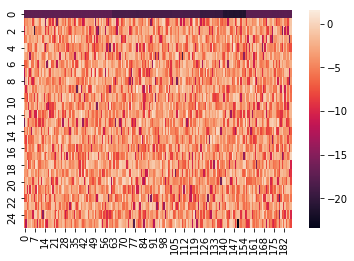

In [760]:
sns.heatmap(np.log(pandas.DataFrame(data)))

In [854]:
class System(simtk.openmm.System):
    ''' Wrapper of openmm system class '''    
    def __init__(self,mol,forcefieldFiles=['3SPN2.xml'],periodicBox=None):
        print('New called')
        self.top=simtk.openmm.app.PDBFile(mol.pdb_file)
        self.coord=simtk.openmm.app.PDBFile(mol.pdb_file)
        self.forcefield=simtk.openmm.app.ForceField(*forcefieldFiles)
        self._wrapped_system = mol.forcefield.createSystem(mol.top.topology)
        self.periodicBox=periodicBox
        if periodicBox is not None:
            self._wrapped_system.setDefaultPeriodicBoxVectors(*np.diag(self.periodic_box))
    
    def __getattr__(self, attr):
        if attr in self.__dict__:
            return getattr(self, attr)
        return getattr(self._wrapped_system, attr)
    
    def clearForces(self,keepCMMotionRemover=True):
        ''' Removes all the forces from the system '''
        for i,f in enumerate(self.getForces()):
            if keepCMMotionRemover and i==0 and f.__class__==simtk.openmm.CMMotionRemover:
                continue
            else:
                self.removeForce(0)
        if keepCMMotionRemover==False:
            assert len(self.getForces())==0, 'Not all the forces were removed'
        else:
            assert len(self.getForces())<=1, 'Not all the forces were removed'
            
    def initializeMD(temperature=300*kelvin, 
                     integrator = simtk.openmm.LangevinIntegrator(temperature, 1E-4/picosecond, 0.1*picoseconds), 
                     platform = simtk.openmm.Platform.getPlatformByName('Reference')):
        self.simulation = simtk.openmm.app.Simulation(self.top.topology, self, integrator,platform)
    
    def set_positions(coords=self.coord.positions):
        simulation.context.setPositions(coords)

NameError: name 'self' is not defined

In [863]:
class Wrapper(object):
    def __init__(self, obj):
        self._wrapped_obj = obj
    def __getattr__(self, attr):
        if attr in self.__dict__:
            return getattr(self, attr)
        return getattr(self._wrapped_obj, attr)


class System(object):
    ''' Wrapper of openmm system class, adds some openmm simulation attributes'''    
    def __init__(self,mol,forcefieldFiles=['3SPN2.xml'],periodicBox=None):
        print('New called')
        self.top=simtk.openmm.app.PDBFile(mol.pdb_file)
        self.coord=simtk.openmm.app.PDBFile(mol.pdb_file)
        self.forcefield=simtk.openmm.app.ForceField(*forcefieldFiles)
        self._wrapped_system = mol.forcefield.createSystem(mol.top.topology)
        self.periodicBox=periodicBox
        if periodicBox is not None:
            self._wrapped_system.setDefaultPeriodicBoxVectors(*np.diag(self.periodic_box))
    
    def __getattr__(self, attr):
        if attr in self.__dict__:
            return getattr(self, attr)
        return getattr(self._wrapped_system, attr)
    
    def clearForces(self,keepCMMotionRemover=True):
        ''' Removes all the forces from the system '''
        for i,f in enumerate(self.getForces()):
            if keepCMMotionRemover and i==0 and f.__class__==simtk.openmm.CMMotionRemover:
                continue
            else:
                self.removeForce(0)
        if keepCMMotionRemover==False:
            assert len(self.getForces())==0, 'Not all the forces were removed'
        else:
            assert len(self.getForces())<=1, 'Not all the forces were removed'
            
    def initializeMD(self,temperature=300*kelvin, 
                     integrator = simtk.openmm.LangevinIntegrator(temperature, 1E-4/picosecond, 0.1*picoseconds), 
                     platform = simtk.openmm.Platform.getPlatformByName('Reference')):
        self.simulation = simtk.openmm.app.Simulation(self.top.topology, self, integrator,platform)
        self.simulation.context.setPositions(self.coord.positions)
        return self.simulation
    
    def setPositions(self,coords=None):
        #Initialize trial MD if not setup
        try:
            self.simulation
        except AttributeError:
            self.initializeMD()
        
        #Set up coords for MD
        if coords==None:
            self.simulation.context.setPositions(self.coord.positions)
        else:
            self.simulation.context.setPositions(coords)
            
    def getPotentialEnergy(self,unit=kilojoule_per_mole):
        #Initialize trial MD if not setup
        try:
            self.simulation
        except AttributeError:
            self.initializeMD()
        
        state = self.simulation.context.getState(getEnergy=True)
        energy= self.state.getPotentialEnergy().value_in_unit(unit)

In [864]:
test=System(DNA)
print(test.getForces())
print(test.clearForces())
print(test.getForces())
test.initializeMD()

New called
[<simtk.openmm.openmm.CMMotionRemover; proxy of <Swig Object of type 'OpenMM::CMMotionRemover *' at 0x7f13e4e8f450> >]
None
[<simtk.openmm.openmm.CMMotionRemover; proxy of <Swig Object of type 'OpenMM::CMMotionRemover *' at 0x7f13e4ccc360> >]


In [887]:
def printParameters(**parameters):
    return parameters
    for i in parameters:
        print(i,parameters[i])
printParameters(**{'temp':2})

{'temp': 2}

In [889]:
DNA.bonds

,type,aai,aaj,DNA,i,j,s1,x0,K2,K3,K4
0,0,2,3,A,P,S,0,4.157,0.143403,0,14.340344
1,0,5,6,A,P,S,0,4.157,0.143403,0,14.340344
2,0,8,9,A,P,S,0,4.157,0.143403,0,14.340344
3,0,11,12,A,P,S,0,4.157,0.143403,0,14.340344
4,0,14,15,A,P,S,0,4.157,0.143403,0,14.340344
5,0,17,18,A,P,S,0,4.157,0.143403,0,14.340344
6,0,20,21,A,P,S,0,4.157,0.143403,0,14.340344
7,0,23,24,A,P,S,0,4.157,0.143403,0,14.340344
8,0,26,27,A,P,S,0,4.157,0.143403,0,14.340344
9,0,29,30,A,P,S,0,4.157,0.143403,0,14.340344


['r0', 'Kb2', 'Kb3', 'Kb4']

In [546]:
#Recompute bond energy
#Do a simulation
from sys import stdout
import time
simulation_platform='Reference'
temperature=300*kelvin
integrator = simtk.openmm.LangevinIntegrator(temperature, 1E-4/picosecond, 0.1*picoseconds)

platform = simtk.openmm.Platform.getPlatformByName(simulation_platform)
simulation = simtk.openmm.app.Simulation(DNA.top.topology, DNA.system, integrator,platform)

simulation.context.setPositions(DNA.coord.positions)
simulation.reporters.append(simtk.openmm.app.PDBReporter('output.pdb', 1000),)
simulation.reporters.append(simtk.openmm.app.DCDReporter('output.dcd', 1000),)
#sim_out=open('sim_out.txt','w+')
simulation.reporters.append(simtk.openmm.app.StateDataReporter(stdout, 1000, step=True,time=True,potentialEnergy=True, temperature=True,separator='\t',))
simulation.reporters.append(simtk.openmm.app.StateDataReporter('sim.log', 1000, step=True,time=True,totalEnergy=True,
                                              kineticEnergy=True,potentialEnergy=True, temperature=True))
state = simulation.context.getState(getEnergy=True)
energy=state.getPotentialEnergy().value_in_unit(kilojoule_per_mole)
print (energy)
simulation.minimizeEnergy()
simulation.context.setVelocitiesToTemperature(300*kelvin)
time0=time.ctime()
time_0=time.time()
simulation.step(100000)

3SPN2.conf		    bond_list.cpp	LICENSE.txt
3SPN_2C.pdf		    bond_list.h		lmp_serial
3SPN2.py		    clean.pdb		output.dcd
3SPN2.xml		    dihedral_3spn2.cpp	output.pdb
3SPN_Scratch.ipynb	    dihedral_3spn2.h	pair_3spn2.cpp
angle_3spn2_stacking.cpp    dihedral_list.cpp	pair_3spn2.h
angle_3spn2_stacking.h	    dihedral_list.h	pair_list.cpp
angle_hybrid.cpp.orig	    doc			pair_list.h
angle_hybrid.cpp.orig.orig  Documentation.pdf	__pycache__
angle_hybrid.patch	    DSIM_ICNF		README.md
angle_list.cpp		    erratum		sim.log
angle_list.h		    examples		updates
base_pair.cpp		    ff3SPN2.py		utils
base_pair.h		    GCGI
bond_hybrid.cpp		    Install.sh


In [856]:
class Force(object):
    def computeEnergy(self, trajectory, system):
        #Parse trajectory
        traj=ff3SPN2.parse_xyz('examples/adna/traj.xyz')
        
        #clear all forces on the system
        system.clearForces()
        #setup the force
        self.setUpInteraction()
        #for each item of the table:
            #add the force item
            
        #compute the energy for every frame
        
        #return a Table with the energy
        
    def computeSingleEnergy(self,trajectory):
        #Parse trajectory
        traj=ff3SPN2.parse_xyz('examples/adna/traj.xyz')
        for i in range(10):
        #for each item of the table:
            #clear all forces on the system
            system.clearForces()
            #setup the force
            self.setUpInteraction()
            #add the force item
            
        #compute the energy for every frame
        
        #return a table with the energy
        
    @staticmethod
    def clearForces(system):
        for i,f in enumerate(system.getForces()):
            system.removeForce(0)
        assert len(system.getForces())==0
    
    def setUpInteraction(self):
        ''' Creates a new force instance '''
        pass
    
    def defineInteractions(self, parameters):
        ''' Adds the parameter for the force '''
        pass
        
    def addForce(system):
        try:        
            system.addForce(self.force)
        except AttributeError:
            print (' The interaction has not been set up ')
            raise AttributeError
    
        
class Bond3SPN2(Force,simtk.openmm.CustomBondForce):
    def setUpInteraction(self):  #Bonds
        bondForce=simtk.openmm.CustomBondForce("Kb2*(r-r0)^2+Kb3*(r-r0)^3+Kb4*(r-r0)^4")
        bondForce.addPerBondParameter('r0')
        bondForce.addPerBondParameter('Kb2')
        bondForce.addPerBondParameter('Kb3')
        bondForce.addPerBondParameter('Kb4')
        bondForce.setUsesPeriodicBoundaryConditions(False)
        self.force=bondForce
        
    def defineInteraction(self,parameters):
        cf=4.184 #Conversion factor from Kcal (lammps) to KJ (openmm)
        for i,b in parameters.iterrows():
            #Units converted from 
            parameters=[b['x0']/10., b['K2']*100*cf, b['K3']*1000*cf, b['K4']*10000*cf]
            self.force.addBond(int(b['aai']), int(b['aaj']), parameters)

## Analyzing distance between atoms in DNA

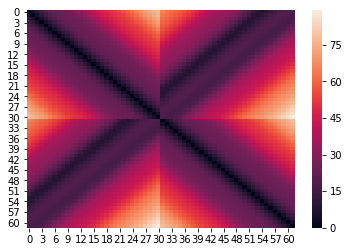

In [160]:
#HEATMAP to see if the atoms are in contact
import scipy.spatial.distance
import seaborn as sns
%matplotlib inline
dist=scipy.spatial.distance.pdist(DNA.atoms[DNA.atoms['type']=='P'][['x','y','z']])
dist=scipy.spatial.distance.squareform(dist)
sns.heatmap(dist)

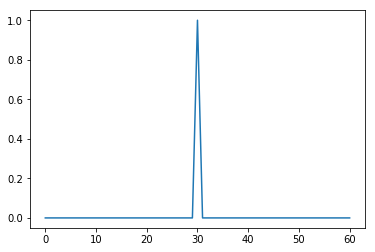

In [161]:
from matplotlib import pyplot as plt
plt.plot(np.diagonal(dist,offset=1)>8)

## Parameter tables from pair_3SPN.cpp

In [131]:
import numpy as np
Santalucia=np.zeros((4,4))

In [132]:
Santalucia[0][0] = -7.6
Santalucia[0][1] = -7.2
Santalucia[0][2] = -7.8
Santalucia[0][3] = -8.4
Santalucia[1][0] = -7.2
Santalucia[1][1] = -7.6
Santalucia[1][2] = -8.5
Santalucia[1][3] = -8.2
Santalucia[2][0] = -8.2
Santalucia[2][1] = -8.4
Santalucia[2][2] = -8.0
Santalucia[2][3] = -9.8
Santalucia[3][0] = -8.5
Santalucia[3][1] = -7.8
Santalucia[3][2] = -10.5
Santalucia[3][3] = -8.0

In [133]:
Santalucia

array([[ -7.6,  -7.2,  -7.8,  -8.4],
       [ -7.2,  -7.6,  -8.5,  -8.2],
       [ -8.2,  -8.4,  -8. ,  -9.8],
       [ -8.5,  -7.8, -10.5,  -8. ]])

In [135]:
angle=np.zeros([6,4,4])
angle[0][0][0] = np.nan
angle[0][0][1] = 116.09
angle[0][0][2] = np.nan
angle[0][0][3] = np.nan
angle[0][1][0] = 116.09
angle[0][1][1] = np.nan
angle[0][1][2] = np.nan
angle[0][1][3] = np.nan
angle[0][2][0] = np.nan
angle[0][2][1] = np.nan
angle[0][2][2] = np.nan
angle[0][2][3] = 124.93
angle[0][3][0] = np.nan
angle[0][3][1] = np.nan
angle[0][3][2] = 124.93
angle[0][3][3] = np.nan

# Defining the angles for cross stacking 1
angle[1][0][0] = 154.38
angle[1][0][1] = 159.10
angle[1][0][2] = 152.46
angle[1][0][3] = 158.38
angle[1][1][0] = 147.10
angle[1][1][1] = 153.79
angle[1][1][2] = 144.44
angle[1][1][3] = 151.48
angle[1][2][0] = 154.69
angle[1][2][1] = 157.83
angle[1][2][2] = 153.43
angle[1][2][3] = 158.04
angle[1][3][0] = 152.99
angle[1][3][1] = 159.08
angle[1][3][2] = 150.53
angle[1][3][3] = 157.17

# Defining the angles for cross stacking 2
angle[2][0][0] = 116.88
angle[2][0][1] = 121.74
angle[2][0][2] = 114.23
angle[2][0][3] = 119.06
angle[2][1][0] = 109.42
angle[2][1][1] = 112.95
angle[2][1][2] = 107.32
angle[2][1][3] = 110.56
angle[2][2][0] = 119.34
angle[2][2][1] = 124.72
angle[2][2][2] = 116.51
angle[2][2][3] = 121.98
angle[2][3][0] = 114.60
angle[2][3][1] = 118.26
angle[2][3][2] = 112.45
angle[2][3][3] = 115.88

# Torsion angles used in base pairing
angle[3][0][0] = np.nan
angle[3][0][1] = -38.35
angle[3][0][2] = np.nan
angle[3][0][3] = np.nan
angle[3][1][0] = -38.35
angle[3][1][1] = np.nan
angle[3][1][2] = np.nan
angle[3][1][3] = np.nan
angle[3][2][0] = np.nan
angle[3][2][1] = np.nan
angle[3][2][2] = np.nan
angle[3][2][3] = -42.98
angle[3][3][0] = np.nan
angle[3][3][1] = np.nan
angle[3][3][2] = -42.98
angle[3][3][3] = np.nan

# Theta 1 angle - (base pairing)
angle[4][0][0] = np.nan
angle[4][0][1] = 156.54
angle[4][0][2] = np.nan
angle[4][0][3] = np.nan
angle[4][1][0] = 135.78
angle[4][1][1] = np.nan
angle[4][1][2] = np.nan
angle[4][1][3] = np.nan
angle[4][2][0] = np.nan
angle[4][2][1] = np.nan
angle[4][2][2] = np.nan
angle[4][2][3] = 159.81
angle[4][3][0] = np.nan
angle[4][3][1] = np.nan
angle[4][3][2] = 141.16
angle[4][3][3] = np.nan

# Theta 2 angle (base pairing)
angle[5][0][0] = np.nan
angle[5][0][1] = 135.78
angle[5][0][2] = np.nan
angle[5][0][3] = np.nan
angle[5][1][0] = 156.54
angle[5][1][1] = np.nan
angle[5][1][2] = np.nan
angle[5][1][3] = np.nan
angle[5][2][0] = np.nan
angle[5][2][1] = np.nan
angle[5][2][2] = np.nan
angle[5][2][3] = 141.16
angle[5][3][0] = np.nan
angle[5][3][1] = np.nan
angle[5][3][2] = 159.81
angle[5][3][3] = np.nan
print('BDNA')
print (angle)


print('BCDNA')
angle=np.zeros([6,4,4])
angle[0][0][0] = np.nan
angle[0][0][1] = 110.92 #was bug
angle[0][0][2] = np.nan
angle[0][0][3] = np.nan
angle[0][1][0] = 110.92 #was bug
angle[0][1][1] = np.nan
angle[0][1][2] = np.nan
angle[0][1][3] = np.nan
angle[0][2][0] = np.nan
angle[0][2][1] = np.nan
angle[0][2][2] = np.nan
angle[0][2][3] = 120.45 #was bug
angle[0][3][0] = np.nan
angle[0][3][1] = np.nan
angle[0][3][2] = 120.45 #was bug
angle[0][3][3] = np.nan


angle[1][0][0] = 154.04
angle[1][0][1] = 158.77
angle[1][0][2] = 153.88
angle[1][0][3] = 157.69
angle[1][1][0] = 148.62
angle[1][1][1] = 155.05
angle[1][1][2] = 147.54
angle[1][1][3] = 153.61
angle[1][2][0] = 153.91
angle[1][2][1] = 155.72
angle[1][2][2] = 151.84
angle[1][2][3] = 157.80
angle[1][3][0] = 152.04
angle[1][3][1] = 157.72
angle[1][3][2] = 151.65
angle[1][3][3] = 154.49

angle[2][0][0] = 116.34
angle[2][0][1] = 119.61
angle[2][0][2] = 115.19
angle[2][0][3] = 120.92
angle[2][1][0] = 107.40
angle[2][1][1] = 110.76
angle[2][1][2] = 106.33
angle[2][1][3] = 111.57
angle[2][2][0] = 121.61
angle[2][2][1] = 124.92
angle[2][2][2] = 120.52
angle[2][2][3] = 124.88
angle[2][3][0] = 112.45
angle[2][3][1] = 115.43
angle[2][3][2] = 110.51
angle[2][3][3] = 115.80

# Torsion angles used in base pairing
angle[3][0][0] = np.nan
#angle[3][0][1] = -38.35
angle[3][0][1] = -38.18
angle[3][0][2] = np.nan
angle[3][0][3] = np.nan
#angle[3][1][0] = -38.35
angle[3][1][0] = -38.18
angle[3][1][1] = np.nan
angle[3][1][2] = np.nan
angle[3][1][3] = np.nan
angle[3][2][0] = np.nan
angle[3][2][1] = np.nan
angle[3][2][2] = np.nan
#angle[3][2][3] = -45.81
angle[3][2][3] = -35.75
angle[3][3][0] = np.nan
angle[3][3][1] = np.nan
#angle[3][3][2] = -45.81
angle[3][3][2] = -35.75
angle[3][3][3] = np.nan

# Theta 1 angle - (base pairing)
angle[4][0][0] = np.nan
#angle[4][0][1] = 156.54
angle[4][0][1] = 153.17
angle[4][0][2] = np.nan
angle[4][0][3] = np.nan
#angle[4][1][0] = 135.78
angle[4][1][0] = 133.51
angle[4][1][1] = np.nan
angle[4][1][2] = np.nan
angle[4][1][3] = np.nan
angle[4][2][0] = np.nan
angle[4][2][1] = np.nan
angle[4][2][2] = np.nan
#angle[4][2][3] = 154.62
angle[4][2][3] = 159.50
angle[4][3][0] = np.nan
angle[4][3][1] = np.nan
#angle[4][3][2] = 152.74
angle[4][3][2] = 138.08
angle[4][3][3] = np.nan

# Theta 2 angle (base pairing)
angle[5][0][0] = np.nan
#angle[5][0][1] = 135.78
angle[5][0][1] = 133.51
angle[5][0][2] = np.nan
angle[5][0][3] = np.nan
#angle[5][1][0] = 156.54
angle[5][1][0] = 153.17
angle[5][1][1] = np.nan
angle[5][1][2] = np.nan
angle[5][1][3] = np.nan
angle[5][2][0] = np.nan
angle[5][2][1] = np.nan
angle[5][2][2] = np.nan
#angle[5][2][3] = 152.74
angle[5][2][3] = 138.08
angle[5][3][0] = np.nan
angle[5][3][1] = np.nan
#angle[5][3][2] = 154.62
angle[5][3][2] = 159.50
angle[5][3][3] = np.nan


print (angle)


print('ADNA')
angle=np.zeros([6,4,4])
# Angle between ba and dc
angle[0][0][0] = np.nan
angle[0][0][1] = 126.57
angle[0][0][2] = np.nan
angle[0][0][3] = np.nan
angle[0][1][0] = 126.57
angle[0][1][1] = np.nan
angle[0][1][2] = np.nan
angle[0][1][3] = np.nan
angle[0][2][0] = np.nan
angle[0][2][1] = np.nan
angle[0][2][2] = np.nan
angle[0][2][3] = 134.71
angle[0][3][0] = np.nan
angle[0][3][1] = np.nan
angle[0][3][2] = 134.71
angle[0][3][3] = np.nan

# Defining the angles for cross stacking 1
angle[1][0][0] = 147.44
angle[1][0][1] = 148.97
angle[1][0][2] = 146.21
angle[1][0][3] = 150.17
angle[1][1][0] = 138.42
angle[1][1][1] = 141.67
angle[1][1][2] = 136.64
angle[1][1][3] = 141.64
angle[1][2][0] = 147.67
angle[1][2][1] = 148.28
angle[1][2][2] = 146.84
angle[1][2][3] = 150.02
angle[1][3][0] = 145.83
angle[1][3][1] = 148.39
angle[1][3][2] = 144.24
angle[1][3][3] = 148.74

# Defining the angles for cross stacking 2
angle[2][0][0] = 130.50
angle[2][0][1] = 138.73
angle[2][0][2] = 126.68
angle[2][0][3] = 134.18
angle[2][1][0] = 130.41
angle[2][1][1] = 134.68
angle[2][1][2] = 127.69
angle[2][1][3] = 131.38
angle[2][2][0] = 130.57
angle[2][2][1] = 140.17
angle[2][2][2] = 126.44
angle[2][2][3] = 135.31
angle[2][3][0] = 132.69
angle[2][3][1] = 138.21
angle[2][3][2] = 129.73
angle[2][3][3] = 134.45

# Torsion angles used in base pairing
angle[3][0][0] = np.nan
angle[3][0][1] = 50.17
angle[3][0][2] = np.nan
angle[3][0][3] = np.nan
angle[3][1][0] = 50.17
angle[3][1][1] = np.nan
angle[3][1][2] = np.nan
angle[3][1][3] = np.nan
angle[3][2][0] = np.nan
angle[3][2][1] = np.nan
angle[3][2][2] = np.nan
angle[3][2][3] = 38.33
angle[3][3][0] = np.nan
angle[3][3][1] = np.nan
angle[3][3][2] = 38.33
angle[3][3][3] = np.nan

# Theta 1 angle - (base pairing)
angle[4][0][0] = np.nan
angle[4][0][1] = 160.91
angle[4][0][2] = np.nan
angle[4][0][3] = np.nan
angle[4][1][0] = 140.49
angle[4][1][1] = np.nan
angle[4][1][2] = np.nan
angle[4][1][3] = np.nan
angle[4][2][0] = np.nan
angle[4][2][1] = np.nan
angle[4][2][2] = np.nan
angle[4][2][3] = 165.25
angle[4][3][0] = np.nan
angle[4][3][1] = np.nan
angle[4][3][2] = 147.11
angle[4][3][3] = np.nan

# Theta 2 angle (base pairing)
angle[5][0][0] = np.nan
angle[5][0][1] = 140.49
angle[5][0][2] = np.nan
angle[5][0][3] = np.nan
angle[5][1][0] = 160.91
angle[5][1][1] = np.nan
angle[5][1][2] = np.nan
angle[5][1][3] = np.nan
angle[5][2][0] = np.nan
angle[5][2][1] = np.nan
angle[5][2][2] = np.nan
angle[5][2][3] = 147.11
angle[5][3][0] = np.nan
angle[5][3][1] = np.nan
angle[5][3][2] = 165.25
angle[5][3][3] = np.nan
print(angle)

BDNA
[[[   nan 116.09    nan    nan]
  [116.09    nan    nan    nan]
  [   nan    nan    nan 124.93]
  [   nan    nan 124.93    nan]]

 [[154.38 159.1  152.46 158.38]
  [147.1  153.79 144.44 151.48]
  [154.69 157.83 153.43 158.04]
  [152.99 159.08 150.53 157.17]]

 [[116.88 121.74 114.23 119.06]
  [109.42 112.95 107.32 110.56]
  [119.34 124.72 116.51 121.98]
  [114.6  118.26 112.45 115.88]]

 [[   nan -38.35    nan    nan]
  [-38.35    nan    nan    nan]
  [   nan    nan    nan -42.98]
  [   nan    nan -42.98    nan]]

 [[   nan 156.54    nan    nan]
  [135.78    nan    nan    nan]
  [   nan    nan    nan 159.81]
  [   nan    nan 141.16    nan]]

 [[   nan 135.78    nan    nan]
  [156.54    nan    nan    nan]
  [   nan    nan    nan 141.16]
  [   nan    nan 159.81    nan]]]
BCDNA
[[[   nan 110.92    nan    nan]
  [110.92    nan    nan    nan]
  [   nan    nan    nan 120.45]
  [   nan    nan 120.45    nan]]

 [[154.04 158.77 153.88 157.69]
  [148.62 155.05 147.54 153.61]
  [153.91 155.7

In [ ]:
print (param)
print('BDNA')
angle=np.zeros([6,4,4])
param[0][0][0] = 6.208
param[0][0][1] = 6.876
param[0][0][2] = 6.072
param[0][0][3] = 6.811
param[0][1][0] = 6.876
param[0][1][1] = 7.480
param[0][1][2] = 6.771
param[0][1][3] = 7.453
param[0][2][0] = 6.072
param[0][2][1] = 6.771
param[0][2][2] = 5.921
param[0][2][3] = 6.688
param[0][3][0] = 6.811
param[0][3][1] = 7.453
param[0][3][2] = 6.688
param[0][3][3] = 7.409


# Equilibrium distance for cross stacking 2
param[1][0][0] = 5.435
param[1][0][1] = 6.295
param[1][0][2] = 5.183
param[1][0][3] = 6.082
param[1][1][0] = 6.295
param[1][1][1] = 7.195
param[1][1][2] = 6.028
param[1][1][3] = 6.981
param[1][2][0] = 5.183
param[1][2][1] = 6.028
param[1][2][2] = 4.934
param[1][2][3] = 5.811
param[1][3][0] = 6.082
param[1][3][1] = 6.981
param[1][3][2] = 5.811
param[1][3][3] = 6.757

# Equilibrium distances for base pairing
param[2][0][0] = np.nan
param[2][0][1] = 5.941
param[2][0][2] = np.nan
param[2][0][3] = np.nan
param[2][1][0] = 5.941
param[2][1][1] = np.nan
param[2][1][2] = np.nan
param[2][1][3] = np.nan
param[2][2][0] = np.nan
param[2][2][1] = np.nan
param[2][2][2] = np.nan
param[2][2][3] = 5.530
param[2][3][0] = np.nan
param[2][3][1] = np.nan
param[2][3][2] = 5.530
param[2][3][3] = np.nan
} else if (strcmp("bdna/curv",dna_type) == 0) {
printf("getting bdna/curv dists!\n")
 #Cross stacking 1
param[0][0][0] = 6.420
param[0][0][1] = 6.770
param[0][0][2] = 6.270
param[0][0][3] = 6.840
param[0][1][0] = 6.770
param[0][1][1] = 7.210
param[0][1][2] = 6.530
param[0][1][3] = 7.080
param[0][2][0] = 6.270
param[0][2][1] = 6.530
param[0][2][2] = 5.740
param[0][2][3] = 6.860
param[0][3][0] = 6.840
param[0][3][1] = 7.080
param[0][3][2] = 6.860
param[0][3][3] = 6.790

#Cross stacking 2
param[1][0][0] = 5.580
param[1][0][1] = 6.140
param[1][0][2] = 5.630
param[1][0][3] = 6.180
param[1][1][0] = 6.140
param[1][1][1] = 6.800
param[1][1][2] = 6.070
param[1][1][3] = 6.640
param[1][2][0] = 5.630
param[1][2][1] = 6.070
param[1][2][2] = 5.870
param[1][2][3] = 5.660
param[1][3][0] = 6.180
param[1][3][1] = 6.640
param[1][3][2] = 5.660
param[1][3][3] = 6.800


param[2][0][0] = np.nan
param[2][0][1] = 5.82
param[2][0][2] = np.nan
param[2][0][3] = np.nan
param[2][1][0] = 5.82
param[2][1][1] = np.nan
param[2][1][2] = np.nan
param[2][1][3] = np.nan
param[2][2][0] = np.nan
param[2][2][1] = np.nan
param[2][2][2] = np.nan
param[2][2][3] = 5.52
param[2][3][0] = np.nan
param[2][3][1] = np.nan
param[2][3][2] = 5.52
param[2][3][3] = np.nan
} else if (strcmp("adna",dna_type) == 0) {
# Equilibrium distance for cross stacking 1
param[0][0][0] = 7.344
param[0][0][1] = 8.081
param[0][0][2] = 7.187
param[0][0][3] = 7.990
param[0][1][0] = 8.081
param[0][1][1] = 8.755
param[0][1][2] = 7.952
param[0][1][3] = 8.697
param[0][2][0] = 7.187
param[0][2][1] = 7.952
param[0][2][2] = 7.019
param[0][2][3] = 7.844
param[0][3][0] = 7.990
param[0][3][1] = 8.697
param[0][3][2] = 7.844
param[0][3][3] = 8.630

# Equilibrium distance for cross stacking 2
param[1][0][0] = 4.624
param[1][0][1] = 5.095
param[1][0][2] = 4.464
param[1][0][3] = 5.162
param[1][1][0] = 5.095
param[1][1][1] = 5.693
param[1][1][2] = 4.896
param[1][1][3] = 5.724
param[1][2][0] = 4.464
param[1][2][1] = 4.896
param[1][2][2] = 4.315
param[1][2][3] = 4.968
param[1][3][0] = 5.162
param[1][3][1] = 5.724
param[1][3][2] = 4.968
param[1][3][3] = 5.759

# Equilibrium distances for base pairing
param[2][0][0] = np.nan
param[2][0][1] = 5.861
param[2][0][2] = np.nan
param[2][0][3] = np.nan
param[2][1][0] = 5.861
param[2][1][1] = np.nan
param[2][1][2] = np.nan
param[2][1][3] = np.nan
param[2][2][0] = np.nan
param[2][2][1] = np.nan
param[2][2][2] = np.nan
param[2][2][3] = 5.528
param[2][3][0] = np.nan
param[2][3][1] = np.nan
param[2][3][2] = 5.528
param[2][3][3] = np.nan
} else error->all(FLERR,"Incorrect dna_type in pair_style 3spn2")